#Tweet Analysis

Using the exsisting data frame of full_list, we will clean and explore the data. 


07/07
 - linear model🌟
 - Coorelation exploration🌟

 07/11
- Text analysis🌟
- Clean-up of code🌟
- Include comments🌟

07/13
-  Model of Compound attribute and specific words


*Keep running the program




# Section 1: Imports 

In [ ]:
!pip install -q lib5c
!lib5c -v

     |████████████████████████████████| 16.2 MB 547 kB/s 
     |████████████████████████████████| 1.2 MB 30.1 MB/s 
lib5c version 0.6.1


In [ ]:
pip install searchtweets

Looking in indexes: https://pypi.org/simple, https://us-python.pkg.dev/colab-wheels/public/simple/


In [ ]:
pip install nrclex

Looking in indexes: https://pypi.org/simple, https://us-python.pkg.dev/colab-wheels/public/simple/
     |████████████████████████████████| 396 kB 4.9 MB/s 
  Created wheel for nrclex: filename=NRCLex-3.0.0-py3-none-any.whl size=43329 sha256=9d12a3b2bbe2895fa25601b1765f3aa57a5b348148d63c629e6b72bd6115f969
  Stored in directory: /root/.cache/pip/wheels/af/2c/9c/dfa19d1b65326c520b32850a9311f6d4eda679ac04dba26081
Successfully built nrclex


In [ ]:
from ctypes import sizeof
import re
import pandas as pd
import tweepy
import math
import csv
import ast
import searchtweets
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
plt.style.use('seaborn-darkgrid')
from getpass import getuser
from operator import delitem
from tweepy import OAuthHandler
from textblob import TextBlob
from nltk.tokenize import TweetTokenizer
from nltk.stem.wordnet import WordNetLemmatizer
from wordcloud import WordCloud, ImageColorGenerator
from nltk.corpus import stopwords
from nltk.sentiment.vader import SentimentIntensityAnalyzer
from nrclex import NRCLex
from sklearn.linear_model import LinearRegression
from sklearn.linear_model import LogisticRegression
from sklearn import metrics
from sklearn.metrics import classification_report, confusion_matrix
from sklearn.model_selection import train_test_split
from sklearn import tree
from sklearn.tree import DecisionTreeClassifier
from sklearn.metrics import top_k_accuracy_score


from sklearn import model_selection, preprocessing, linear_model, naive_bayes, metrics, svm
from sklearn.feature_extraction.text import TfidfVectorizer, CountVectorizer

In [ ]:
import nltk
import ssl
try:
    _create_unverified_https_context = ssl._create_unverified_context
except AttributeError:
    pass
else:
    ssl._create_default_https_context = _create_unverified_https_context

nltk.download('wordnet')
nltk.download('omw-1.4')
nltk.download('stopwords')
nltk.download('vader_lexicon')
nltk.download('punkt')

[nltk_data] Downloading package wordnet to /root/nltk_data...
[nltk_data] Downloading package omw-1.4 to /root/nltk_data...
[nltk_data] Downloading package stopwords to /root/nltk_data...
[nltk_data]   Unzipping corpora/stopwords.zip.
[nltk_data] Downloading package vader_lexicon to /root/nltk_data...
[nltk_data] Downloading package punkt to /root/nltk_data...
[nltk_data]   Unzipping tokenizers/punkt.zip.


True

In [ ]:
from google.colab import drive

drive.mount('/content/drive')
path = '/content/drive/My Drive/full_list.csv'

Mounted at /content/drive


In [ ]:
#Reading the File
df = pd.read_csv('/content/drive/My Drive/full_list.csv')

#geo column has been null for the entire duration of the project
df = df.drop('geo', axis=1)

#Removing the index
df = df.drop('Unnamed: 0', axis=1)

#Section 2: Review of the Data Set

The orginial data set comes from the new_getTweets program. The CSV file exports to full_list.csv. In our original overview of the data set, there were a number of issues with the three attributes sentiment, compound, and compund_result. These attributes were included locally in the new_getTweets program. To midigate any further errors, a new data frame (new_df), was created in which these attributes were again calculated locally on *this* data set. 

In [ ]:
df.head()

,screen name,likes,retweets,date,verified,URL,text
0,imendangerous,0,0,2022-06-14 18:24:26,False,https://twitter.com/imendangerous/status/15367...,PFAS Neonicotinoids On 6 15 Congressional hear...
1,drake_phd,0,0,2022-06-14 18:21:50,False,https://twitter.com/drake_phd/status/153677593...,Our lab is officially on the way to Wilmington...
2,Shirley33594843,0,0,2022-06-14 18:21:17,False,https://twitter.com/Shirley33594843/status/153...,Forever Chemicals Linked to Heart Risks Medici...
3,AlephBlog,1,1,2022-06-14 18:18:32,False,https://twitter.com/AlephBlog/status/153677511...,A 3M factory spewed forever chemicals for deca...
4,puronics,0,1,2022-06-14 18:16:13,False,https://twitter.com/puronics/status/1536774527...,A study estimated that two of the most common ...


In [ ]:
df.describe(include='all')

,screen name,likes,retweets,date,verified,URL,text
count,1000,1000.000000,1000.000000,1000,1000,1000,1000
unique,659,NaN,NaN,800,2,806,674
top,katierosenberg,NaN,NaN,2022-06-14 16:35:52,False,https://twitter.com/imendangerous/status/15367...,Forever chemicals linked to high blood pressur...
freq,9,NaN,NaN,4,823,2,34
mean,NaN,1.679000,0.494000,NaN,NaN,NaN,NaN
std,NaN,10.710494,1.775138,NaN,NaN,NaN,NaN
min,NaN,0.000000,0.000000,NaN,NaN,NaN,NaN
25%,NaN,0.000000,0.000000,NaN,NaN,NaN,NaN
50%,NaN,0.000000,0.000000,NaN,NaN,NaN,NaN
75%,NaN,1.000000,0.000000,NaN,NaN,NaN,NaN


In [ ]:
df['text'] = df['text'].astype(str)

In [ ]:
df.isnull().sum()

screen name    0
likes          0
retweets       0
date           0
verified       0
URL            0
text           0
dtype: int64

#Section 3: The New Data Set

Here we have created a new data set that includes the sentiment score and compound results. We believe it will be more efficient to calculate the score as the data set updates with new data, rather than re-run the new_getTweets program and calculate the columns there. We will use these new columns with our analysis. 

In [ ]:
new_df = df

Tokenization means that we are separating each word in the tweet into single words to be used

In [ ]:
tknzr = TweetTokenizer(strip_handles=True, reduce_len=True)
new_df.text = [tknzr.tokenize(tweets) for tweets in new_df.text]

In [ ]:
le = WordNetLemmatizer()
lemma_text = []
for index in range(len(df.text)):
    tweet = [le.lemmatize(word,pos = "n") for word in new_df.text[index]]
    lemma_text.append(tweet)

print(lemma_text[0:10])


[['PFAS', 'Neonicotinoids', 'On', '6', '15', 'Congressional', 'hearing', 'on', 'SerestoFleaCollars', 'linked', 'to', 'more', 'than', '2', '500', 'pet', 'death', 's', 'Nathan', 'Donley', 'will', 'testify', 'on', 'how', 'the', 'EPA', 'ha', 'failed', 'to', 'take', 'action', 'amp', 'read', 'this', 'via'], ['Our', 'lab', 'is', 'officially', 'on', 'the', 'way', 'to', 'Wilmington', 'Excited', 'to', 'see', 'so', 'many', 'folk', 'in', 'one', 'place', 'to', 'talk', 'PFAS'], ['Forever', 'Chemicals', 'Linked', 'to', 'Heart', 'Risks', 'MedicineNet', 'Health', 'News'], ['A', '3M', 'factory', 'spewed', 'forever', 'chemical', 'for', 'decade', 'polluting', 'the', 'land', 'water', 'and', 'people', 'living', 'near', 'it', 'Now', 'a', 'fight', 'is', 'unfolding', 'over', 'how', 'to', 'clean', 'up', 'the', 'toxic', 'mess', 'There', 'wa', 'a', 'significant', 'amount', 'of', 'deception', 'going', 'on', 'here', 'with', 'MMM', 'Really', 'ugly'], ['A', 'study', 'estimated', 'that', 'two', 'of', 'the', 'most', 'c

In [ ]:
stop = set(stopwords.words('english'))
all_stop =['https', 'say','a','A','b','B']
tokens_without_sw =[]
for index in range (len(lemma_text)):
  tokens = [word for word in lemma_text[index] if not word in stop]
  tokens_without_sw.append(tokens)

In [ ]:
tokens_without_all_stop =[]
for index in range (len(tokens_without_sw)):
  tokens = [word for word in tokens_without_sw[index] if not word in all_stop]
  tokens_without_all_stop.append(tokens)

In [ ]:
tokens_without_all_stop[:1]

[['PFAS',
  'Neonicotinoids',
  'On',
  '6',
  '15',
  'Congressional',
  'hearing',
  'SerestoFleaCollars',
  'linked',
  '2',
  '500',
  'pet',
  'death',
  'Nathan',
  'Donley',
  'testify',
  'EPA',
  'ha',
  'failed',
  'take',
  'action',
  'amp',
  'read',
  'via']]

In [ ]:
tokens_filtered =[]
for index in range (len(tokens_without_all_stop)):
  tokens = [token  for token in tokens_without_all_stop[index] if len(token)>3]
  tokens_filtered.append(tokens)
tokens_filtered[0]

['PFAS',
 'Neonicotinoids',
 'Congressional',
 'hearing',
 'SerestoFleaCollars',
 'linked',
 'death',
 'Nathan',
 'Donley',
 'testify',
 'failed',
 'take',
 'action',
 'read']

In [ ]:
for i in range(len(tokens_filtered)):
    tokens_filtered[i] = ' '.join(tokens_filtered[i])
new_df['text'] = tokens_filtered

In [ ]:
sia = SentimentIntensityAnalyzer()

In [ ]:
new_df['sentiment'] = new_df['text'].apply(lambda tweet:sia.polarity_scores(tweet))
new_df['sentiment'][0:10]
new_df['compound'] = new_df['sentiment'].apply(lambda x:x['compound'])
new_df['compound_result'] = new_df['compound'].apply(lambda score: 'pos' if score > 0 else ('neg' if score < 0 else 'neu'))
new_df = new_df[['screen name', 'sentiment', 'compound', 'compound_result', 'likes','retweets','date','verified','URL','text']]
new_df

,screen name,sentiment,compound,compound_result,likes,retweets,date,verified,URL,text
0,imendangerous,"{'neg': 0.375, 'neu': 0.625, 'pos': 0.0, 'comp...",-0.8020,neg,0,0,2022-06-14 18:24:26,False,https://twitter.com/imendangerous/status/15367...,PFAS Neonicotinoids Congressional hearing Sere...
1,drake_phd,"{'neg': 0.0, 'neu': 0.745, 'pos': 0.255, 'comp...",0.3400,pos,0,0,2022-06-14 18:21:50,False,https://twitter.com/drake_phd/status/153677593...,officially Wilmington Excited many folk place ...
2,Shirley33594843,"{'neg': 0.231, 'neu': 0.769, 'pos': 0.0, 'comp...",-0.2732,neg,0,0,2022-06-14 18:21:17,False,https://twitter.com/Shirley33594843/status/153...,Forever Chemicals Linked Heart Risks MedicineN...
3,AlephBlog,"{'neg': 0.35, 'neu': 0.514, 'pos': 0.136, 'com...",-0.7960,neg,1,1,2022-06-14 18:18:32,False,https://twitter.com/AlephBlog/status/153677511...,factory spewed forever chemical decade polluti...
4,puronics,"{'neg': 0.0, 'neu': 1.0, 'pos': 0.0, 'compound...",0.0000,neu,0,1,2022-06-14 18:16:13,False,https://twitter.com/puronics/status/1536774527...,study estimated common forever chemical found ...
...,...,...,...,...,...,...,...,...,...,...
995,RobertBilott,"{'neg': 0.241, 'neu': 0.759, 'pos': 0.0, 'comp...",-0.6597,neg,35,13,2022-08-01 12:58:13,False,https://twitter.com/RobertBilott/status/155408...,Beyond shameful took decade finally take step ...
996,McclainPadgett,"{'neg': 0.167, 'neu': 0.833, 'pos': 0.0, 'comp...",-0.5267,neg,1,1,2022-08-01 12:49:47,False,https://twitter.com/McclainPadgett/status/1554...,Vote VoteNo PACTAct Veteran BurnPit ToxicExpos...
997,McclainPadgett,"{'neg': 0.167, 'neu': 0.833, 'pos': 0.0, 'comp...",-0.5267,neg,0,0,2022-08-01 12:49:05,False,https://twitter.com/McclainPadgett/status/1554...,Vote VoteNo PACTAct Veteran BurnPit ToxicExpos...
998,xethorn,"{'neg': 0.0, 'neu': 1.0, 'pos': 0.0, 'compound...",0.0000,neu,0,0,2022-08-01 12:44:43,False,https://twitter.com/xethorn/status/15540857197...,Most manufacturer water source Wondering long ...


*Note: Included in this new data set (new_df), there is an additional column called total words. This column is a count of the total number of words in the text column.

In [ ]:
#Total number of words column
new_df['totalwords'] = [len(x.split()) for x in new_df['text'].tolist()]

/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  


In [ ]:
new_df.head()

,screen name,sentiment,compound,compound_result,likes,retweets,date,verified,URL,text,totalwords
0,imendangerous,"{'neg': 0.375, 'neu': 0.625, 'pos': 0.0, 'comp...",-0.8020,neg,0,0,2022-06-14 18:24:26,False,https://twitter.com/imendangerous/status/15367...,PFAS Neonicotinoids Congressional hearing Sere...,14
1,drake_phd,"{'neg': 0.0, 'neu': 0.745, 'pos': 0.255, 'comp...",0.3400,pos,0,0,2022-06-14 18:21:50,False,https://twitter.com/drake_phd/status/153677593...,officially Wilmington Excited many folk place ...,8
2,Shirley33594843,"{'neg': 0.231, 'neu': 0.769, 'pos': 0.0, 'comp...",-0.2732,neg,0,0,2022-06-14 18:21:17,False,https://twitter.com/Shirley33594843/status/153...,Forever Chemicals Linked Heart Risks MedicineN...,8
3,AlephBlog,"{'neg': 0.35, 'neu': 0.514, 'pos': 0.136, 'com...",-0.7960,neg,1,1,2022-06-14 18:18:32,False,https://twitter.com/AlephBlog/status/153677511...,factory spewed forever chemical decade polluti...,23
4,puronics,"{'neg': 0.0, 'neu': 1.0, 'pos': 0.0, 'compound...",0.0000,neu,0,1,2022-06-14 18:16:13,False,https://twitter.com/puronics/status/1536774527...,study estimated common forever chemical found ...,19


## A. Cleaning the data set

In [ ]:
#Checking the data types
new_df.dtypes

screen name         object
sentiment           object
compound           float64
compound_result     object
likes                int64
retweets             int64
date                object
verified              bool
URL                 object
text                object
totalwords           int64
dtype: object

In [ ]:
#Checking the counts
new_df.count()

screen name        1000
sentiment          1000
compound           1000
compound_result    1000
likes              1000
retweets           1000
date               1000
verified           1000
URL                1000
text               1000
totalwords         1000
dtype: int64

In [ ]:
#Dropping any missing values
new_df = new_df.dropna()



---



## B. Exploring the Data Set

In [ ]:
new_df.describe(include = 'all')

,screen name,sentiment,compound,compound_result,likes,retweets,date,verified,URL,text,totalwords
count,1000,1000,1000.000000,1000,1000.000000,1000.000000,1000,1000,1000,1000,1000.000000
unique,659,464,NaN,3,NaN,NaN,800,2,806,668,NaN
top,katierosenberg,"{'neg': 0.0, 'neu': 1.0, 'pos': 0.0, 'compound...",NaN,neg,NaN,NaN,2022-06-14 16:35:52,False,https://twitter.com/imendangerous/status/15367...,Forever chemical linked high blood pressure mi...,NaN
freq,9,293,NaN,360,NaN,NaN,4,823,2,36,NaN
mean,NaN,NaN,-0.013314,NaN,1.679000,0.494000,NaN,NaN,NaN,NaN,13.563000
std,NaN,NaN,0.452141,NaN,10.710494,1.775138,NaN,NaN,NaN,NaN,6.236259
min,NaN,NaN,-0.968500,NaN,0.000000,0.000000,NaN,NaN,NaN,NaN,1.000000
25%,NaN,NaN,-0.296000,NaN,0.000000,0.000000,NaN,NaN,NaN,NaN,8.750000
50%,NaN,NaN,0.000000,NaN,0.000000,0.000000,NaN,NaN,NaN,NaN,12.500000
75%,NaN,NaN,0.296000,NaN,1.000000,0.000000,NaN,NaN,NaN,NaN,19.000000


In [ ]:
# Coorelation between attributes
new_df.corr()

,compound,likes,retweets,verified,totalwords
compound,1.000000,0.077021,0.041791,0.068860,0.100367
likes,0.077021,1.000000,0.760339,0.134323,0.062370
retweets,0.041791,0.760339,1.000000,0.245966,0.111932
verified,0.068860,0.134323,0.245966,1.000000,-0.032640
totalwords,0.100367,0.062370,0.111932,-0.032640,1.000000


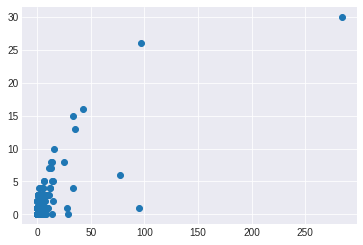

In [ ]:
plt.scatter(new_df['likes'], new_df['retweets'])

We found that the majority of the sentiment in the tweets was negative.

<BarContainer object of 1000 artists>

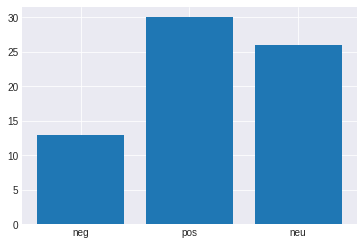

In [ ]:
plt.bar(new_df['compound_result'], new_df['retweets'])

(array([ 77.,  44.,  72., 101.,  66., 334.,  90.,  83.,  74.,  59.]),
 array([-0.9685 , -0.77852, -0.58854, -0.39856, -0.20858, -0.0186 ,
         0.17138,  0.36136,  0.55134,  0.74132,  0.9313 ]),
 <a list of 10 Patch objects>)

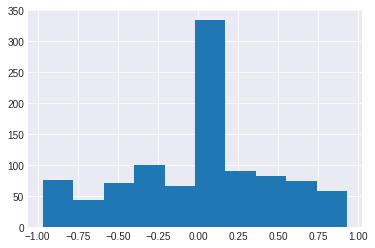

In [ ]:
plt.hist(df['compound'])

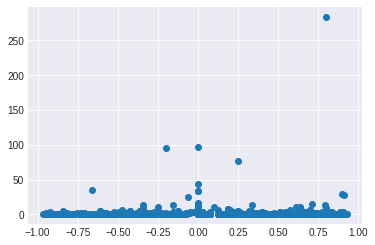

In [ ]:
plt.scatter(df['compound'], df['likes'])

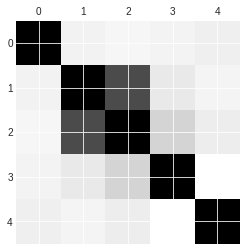

In [ ]:
plt.matshow(new_df.corr())
plt.show()



---



#Section 4: Text Analysis

In this sections we will begin the analysis of our text: 


We are hoping to analyze the relationship between the emotions of text, the word type, and the length of the text, and its correlation to the popularity of the message. These attributes will be measured against the likes and retweets columns. 

In [ ]:
#A new variable that creates a specfically modified text
word_text = new_df["text"].str.split(" ", n=-1)

In [ ]:
#word_count function, this function counts each word in the given index and has
#a the total of the count
  #Arguement: The index of the column
  #Return: Each word and the count

def word_count(str):
    counts = dict()
    i = 0
    for word in word_text[i]:
        if word in counts:
            counts[word] += 1
        else:
            counts[word] = 1
        i=i+1
    return counts

#Example: 
word_count(0)

{'Congressional': 1,
 'Donley': 1,
 'Nathan': 1,
 'Neonicotinoids': 1,
 'PFAS': 1,
 'SerestoFleaCollars': 1,
 'action': 1,
 'death': 1,
 'failed': 1,
 'hearing': 1,
 'linked': 1,
 'read': 1,
 'take': 1,
 'testify': 1}

In [ ]:
#A Function that searches all words in the text returns the count of the 'KEY' word
def wordSearch (word_text, str):
    count=0
    for i in word_text:
      for j in i:
          if (j == str):
            count+=1
    return count

In [ ]:
#Using the Function
#Creating a new list with the counts of each word 
count_list = []
PFAS = wordSearch(word_text, 'PFAS')
count_list.append(PFAS)
PFOS = wordSearch(word_text, 'PFOS')
count_list.append(PFOS)
PFOA = wordSearch(word_text, 'PFOA')
count_list.append(PFOA)
PFHxA = wordSearch(word_text, 'PFHxA')
count_list.append(PFHxA)
EPA = wordSearch(word_text, 'EPA')
count_list.append(EPA)
chemicals = wordSearch(word_text, 'chemicals')
count_list.append(chemicals)
forever = wordSearch(word_text, 'forever')
count_list.append(forever)
health = wordSearch(word_text, 'health')
count_list.append(health)
drinking = wordSearch(word_text, 'drinking')
count_list.append(drinking)
water = wordSearch(word_text, 'water')
count_list.append(water)

In [ ]:
#Dataframe of words and their association
special_word = ['PFSA', 'PFOS', 'PFOA', 'PFHxA', 'EPA', 'chemicals', 'forever', 'health', 'drinking', 'water']
key_df = pd.DataFrame(columns=['word', 'count', 'present', 'likes', 'retweets', 'compound', 'compound_result'])
key_df['word'] = special_word
key_df['count'] = count_list
key_df['likes'] = new_df['likes']
key_df['retweets'] = new_df['retweets']
key_df['likes'] = new_df['likes']
key_df['compound'] = new_df['compound']
key_df['compound_result'] = new_df['compound_result']

In [ ]:
#A function that shows whether the word is present; A list that stores the data
label_list = []
def wordList (label_list): 
    for i in range(len(key_df)):
      if (key_df['count'][i]) > 1:
        present = 1
      else:
        present = 0
      label_list.append(present)
    return label_list

wordList(label_list)
key_df['present'] = label_list

In [ ]:
#The New Dataframe
key_df

,word,count,present,likes,retweets,compound,compound_result
0,PFSA,620,1,0,0,-0.8020,neg
1,PFOS,22,1,0,0,0.3400,pos
2,PFOA,48,1,0,0,-0.2732,neg
3,PFHxA,0,0,1,1,-0.7960,neg
4,EPA,0,0,0,1,0.0000,neu
5,chemicals,0,0,0,0,0.3182,pos
6,forever,245,1,0,0,-0.2960,neg
7,health,72,1,0,0,-0.7430,neg
8,drinking,107,1,0,0,-0.2960,neg
9,water,261,1,0,0,0.0000,neu


The most common word found in the tweets was PFAS. 

Bar Graph of Key Words


<BarContainer object of 10 artists>

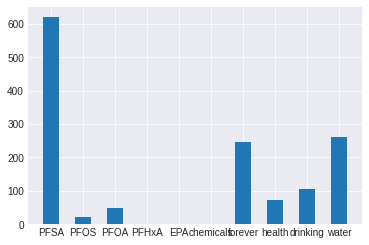

In [ ]:
#Visual of Common Words
print('Bar Graph of Key Words')
linewidth = 0.5
plt.bar(key_df['word'], key_df['count'], linewidth)

Additionally, the word PFAS recieves the highest negative compound score. This means that the word is preceived with a negative connotation. 

Bar Graph of Word Reception


<BarContainer object of 10 artists>

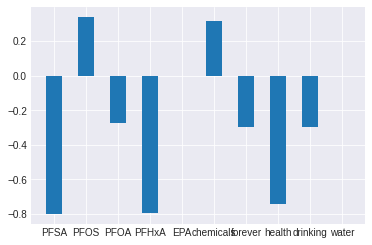

In [ ]:
#Visual of the Word and the compound result
print('Bar Graph of Word Reception')
linewidth = 0.5
plt.bar(key_df['word'], key_df['compound'], linewidth)

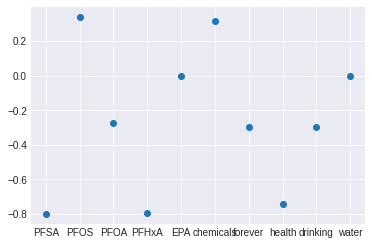

In [ ]:
plt.scatter(key_df['word'], key_df['compound'])

In [ ]:
#Coorelation of the attributes
corr = key_df.corr()
corr.style.background_gradient(cmap='coolwarm')

,count,present,likes,retweets,compound
count,1.000000,0.486102,-0.247511,-0.371267,-0.412866
present,0.486102,1.000000,-0.509175,-0.763763,-0.154136
likes,-0.247511,-0.509175,1.000000,0.666667,-0.444605
retweets,-0.371267,-0.763763,0.666667,1.000000,-0.176462
compound,-0.412866,-0.154136,-0.444605,-0.176462,1.000000


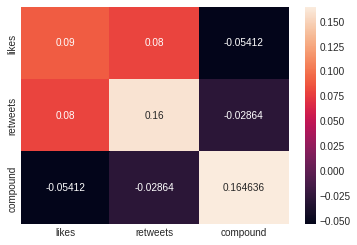

In [ ]:
#Covariance of the attributes
data = [key_df['likes'], key_df['retweets'], key_df['compound']]
labs = ['likes', 'retweets', 'compound']
covMatrix = np.cov(data,bias=True)
sns.heatmap(covMatrix, annot=True, fmt='g', xticklabels=labs, yticklabels=labs)
plt.show()

array([[<matplotlib.axes._subplots.AxesSubplot object at 0x7fe0fb46fed0>,
      dtype=object)

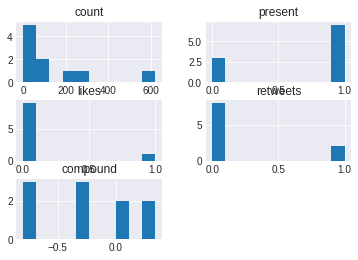

In [ ]:
#Histogram of Attributes
key_df.hist()

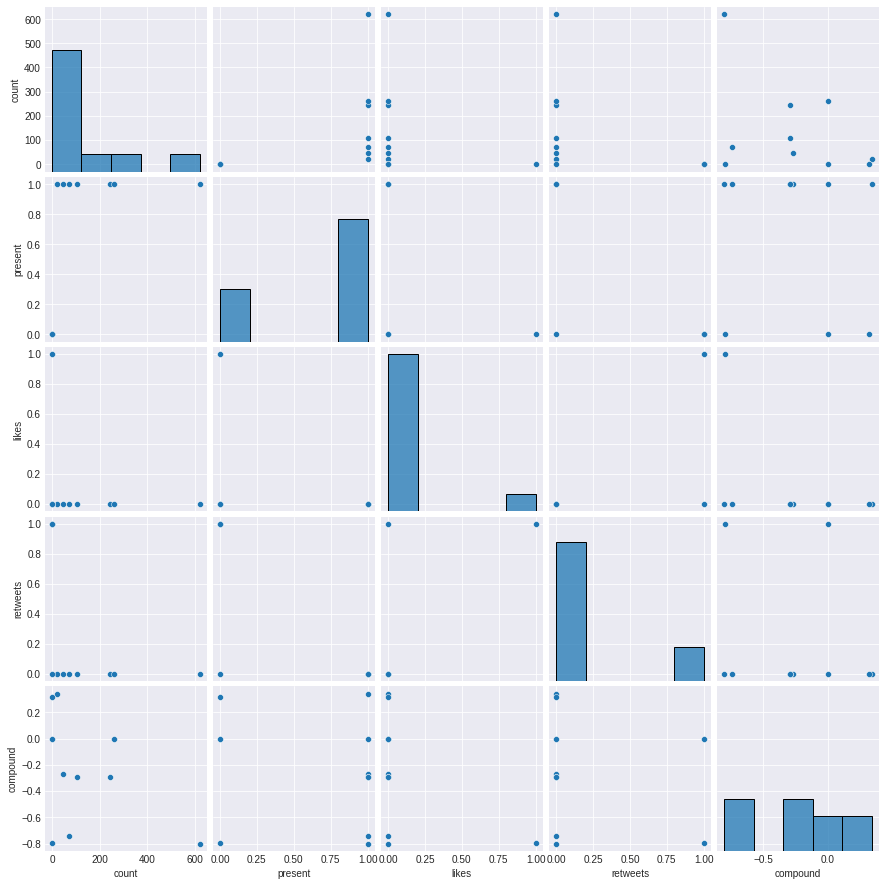

In [ ]:
sns.pairplot(key_df)

#Section 5: Linear Regression



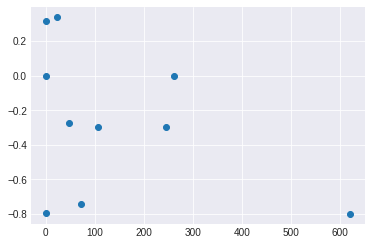

In [ ]:
plt.scatter(key_df['count'], key_df['compound'])

##A. Linear Regression Model

In [ ]:
#Three functions used to create a linear regression model

In [ ]:
 def estimate_coef(x, y):
    # number of observations/points
    n = np.size(x)
  
    # mean of x and y vector
    m_x = np.mean(x)
    m_y = np.mean(y)
  
    # calculating cross-deviation and deviation about x
    SS_xy = np.sum(y*x) - n*m_y*m_x
    SS_xx = np.sum(x*x) - n*m_x*m_x
  
    # calculating regression coefficients
    b_1 = SS_xy / SS_xx
    b_0 = m_y - b_1*m_x
  
    return (b_0, b_1)


In [ ]:
def plot_regression_line(x, y, b):
    # plotting the actual points as scatter plot
    plt.scatter(x, y, color = "m",
               marker = "o", s = 30)
  
    # predicted response vector
    y_pred = b[0] + b[1]*x
  
    # plotting the regression line
    plt.plot(x, y_pred, color = "g")
  
    # putting labels
    plt.xlabel('x')
    plt.ylabel('y')
  
    # function to show plot
    plt.show()

In [ ]:
def plotModel(x, y):
    # estimating coefficients
    b = estimate_coef(x, y)
    print("Estimated coefficients:\nb_0 = {}  \
          \nb_1 = {}".format(b[0], b[1]))
  
    # plotting regression line
    plot_regression_line(x, y, b)


The relation between the Compound Score and the number of Likes a twitter post generates. 

Estimated coefficients:
b_0 = 1.7032917406109165            
b_1 = 1.8245124049628954


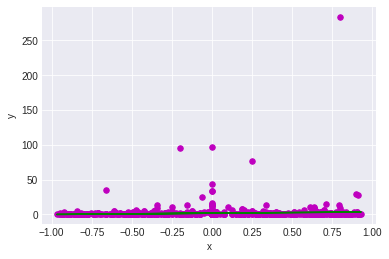

In [ ]:
plotModel(new_df['compound'], new_df['likes'])

The relation between Likes and Retweets. 

Estimated coefficients:
b_0 = 0.2824170033080029            
b_1 = 0.12601727021560277


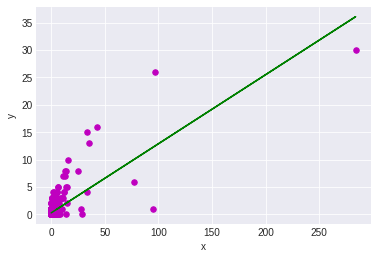

In [ ]:
plotModel(new_df['likes'], new_df['retweets'])

If a key word is in the given post, Present will be 1. Given this, the model measures the relationship between the presence of the word and the compound score. 

Estimated coefficients:
b_0 = -0.1592666666666666            
b_1 = -0.13647619047619053


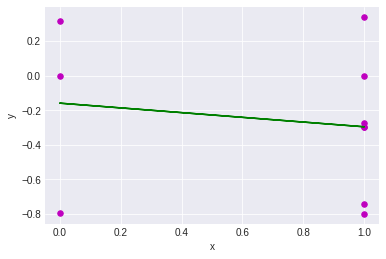

In [ ]:
plotModel(key_df['present'], key_df['compound'])

Estimated coefficients:
b_0 = -0.1120090867450405            
b_1 = 0.007276781445479649


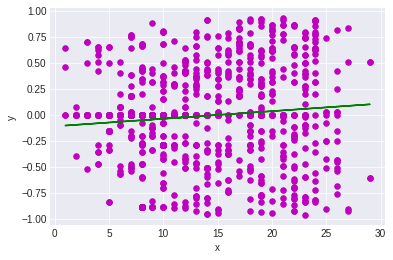

In [ ]:
plotModel(new_df['totalwords'], new_df['compound'])

In [ ]:
#plotModel(new_df['compound'], new_df['present'])



---

